In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from aquarel import load_theme

In [3]:
theme = load_theme('arctic_dark')
theme.apply()

In [4]:
GS000 = pd.read_csv('GS000.csv')
GS001 = pd.read_csv('GS001.csv')
GS002 = pd.read_csv('GS002.csv')
GS003 = pd.read_csv('GS003.csv')
GS004 = pd.read_csv('GS004.csv')
GS005 = pd.read_csv('GS005.csv')

GS001_wavesol = pd.read_csv('GS001_wavesol_85.csv')
GS002_wavesol = pd.read_csv('GS002_wavesol_85.csv')
GS003_wavesol = pd.read_csv('GS003_wavesol_85.csv')
GS004_wavesol = pd.read_csv('GS004_wavesol_85.csv')
GS005_wavesol = pd.read_csv('GS005_wavesol_85.csv')

-2.5392750015691035e-06


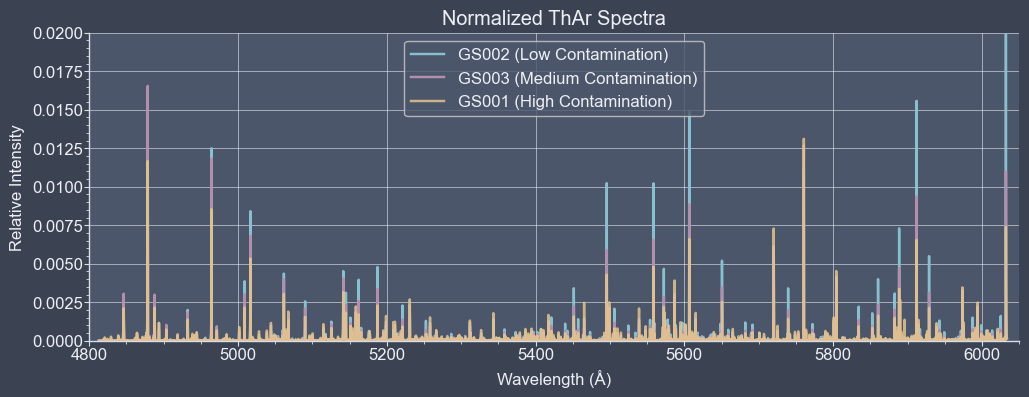

In [11]:
spectra = np.array([GS001_wavesol['intensity'],GS002_wavesol['intensity'],GS003_wavesol['intensity'],GS004_wavesol['intensity'],GS005_wavesol['intensity']])
GS3_interp_2 = np.interp(GS002_wavesol['wavelength'],GS003_wavesol['wavelength'], GS003_wavesol['intensity'])
GS1_interp_2 = np.interp(GS002_wavesol['wavelength'], GS001_wavesol['wavelength'], GS001_wavesol['intensity'])

plt.figure(figsize = (12, 4))
# plt.plot(GS000['pixel'], spectra[0], color = '#e5e9f0', label = 'GS000', alpha = 1)

plt.plot(GS002_wavesol['wavelength'], GS002_wavesol['intensity'], color = '#88c0d0', label = 'GS002 (Low Contamination)')
plt.plot(GS002_wavesol['wavelength'], GS3_interp_2, color = '#b48ead', label = 'GS003 (Medium Contamination)')
plt.plot(GS002_wavesol['wavelength'], GS1_interp_2, color = '#ebcb8b', label = 'GS001 (High Contamination)', alpha = 0.8)
# plt.yscale('log')
# plt.plot(GS002_wavesol['wavelength'], spectra[1], color = '#bf616a', label = 'GS002', alpha = 0.8)
print(np.min(GS002_wavesol['intensity']))

# plt.plot(GS005_wavesol['wavelength'], spectra[4], color = '#b48ead', label = 'GS005', alpha = 0.8)
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Relative Intensity')
plt.xlim(4800, 6050)
plt.ylim(0, 0.02)
# plt.ylim(0,0.0013)
# plt.xlim(5113,5127)
# plt.xlim(5810, 5820)
plt.title('Normalized ThAr Spectra')
plt.savefig('ThAr_comp3.png', bbox_inches='tight')
plt.show()

4.2783825259578245


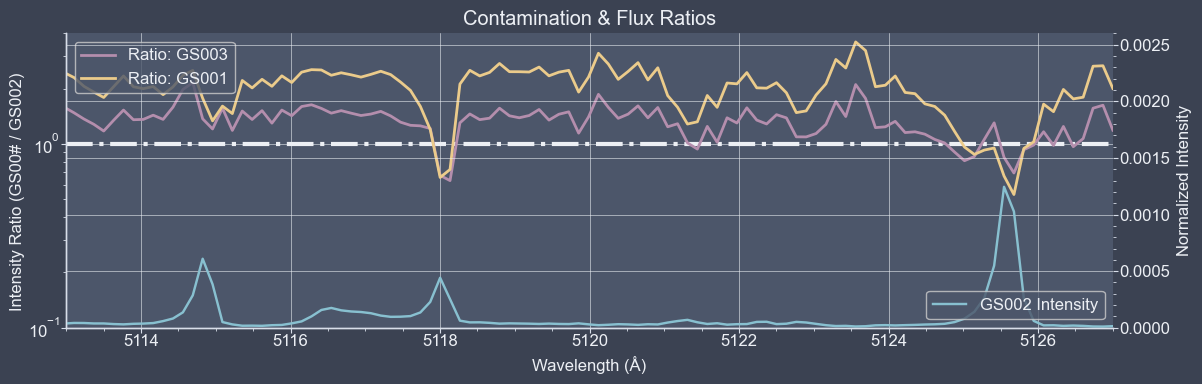

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
# print(GS3_interp_4)

ratio32_interp = GS3_interp_2 / GS002_wavesol['intensity']
print(np.max(ratio32_interp[5000:6000]))
ratio12_interp = GS1_interp_2 / GS002_wavesol['intensity']

# ratio54_interp = GS5_interp_4 / GS004_wavesol['intensity']
ax2 = ax.twinx()
ax.axhline(1, lw = 3, ls = '-.', c = '#eceff4')
ax.plot(GS002_wavesol['wavelength'], ratio32_interp, label = 'Ratio: GS003', c = '#b48ead', lw = 2)
# ax[1].set_title('GS003')
# ax[1].set_xlim(5110, 5130)
# ax[1].set_ylim(0.1, 10)
# ax[1].set_yscale('log')
# ax[1].set_xlabel('Wavelength (Angstroms)')
ax.set_title('Contamination & Flux Ratios')
ax.set_xlim(5113,5127)
ax.set_xlabel('Wavelength (Å)')
ax.set_ylim(0.1, 4)
ax.set_yscale('log')
ax.plot(GS002_wavesol['wavelength'], ratio12_interp, label = 'Ratio: GS001', c = '#ebcb8b', lw = 2)
ax.legend(loc = 'upper left')

ax2.set_ylabel('Normalized Intensity')  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(GS002_wavesol['wavelength'], GS002_wavesol['intensity'], c = '#88c0d0', label = 'GS002 Intensity')
ax2.set_ylim(0, 0.0026)
# ax[2].plot(GS004_wavesol['wavelength'], ratio54_interp, label = 'GS001')
# ax[0].set_xlim(4950, 5000)
# ax[0].set_xlim(5110, 5170)
# ax[1].set_xlim(5110, 5170)
# ax[2].set_xlim(5110, 5170)
# ax[0].set_ylim(0, 75)
# ax[1].set_ylim(0, 75)
# ax[2].set_ylim(0, 75)
# ax[2].set_xlim(4950, 5000)

# ax[3].plot(GS004_wavesol['wavelength'],GS3_interp_4, label = 'GS003')
# ax[3].plot(GS004_wavesol['wavelength'],GS1_interp_4, label ='GS001')
# ax[3].plot(GS004_wavesol['wavelength'],GS5_interp_4,label = 'GS005' )
# ax[3].plot(GS004_wavesol['wavelength'],GS004_wavesol['intensity'],label = 'GS004' )
# ax[3].set_xlim(5110, 5130)
# ax[3].set_ylim(0, 0.002)
# fig.suptitle('Flux Ratios')
plt.legend(loc = 'lower right')
fig.tight_layout()
fig.text(0.0, 0.5, 'Intensity Ratio (GS00# / GS002)', va='center', rotation='vertical')
plt.savefig('ratio_plots2.png', bbox_inches='tight')
plt.show()

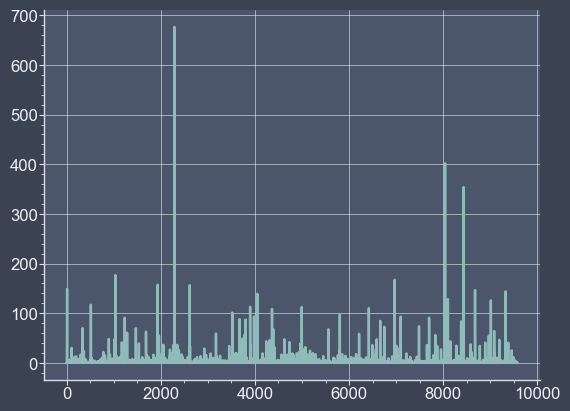

In [4]:
ratio01 = GS001['intensity'] / GS000['intensity']
plt.plot(GS000['pixel'], ratio01)
# plt.xlim(4400,4500)
# plt.ylim(0, 1.5)
plt.show()

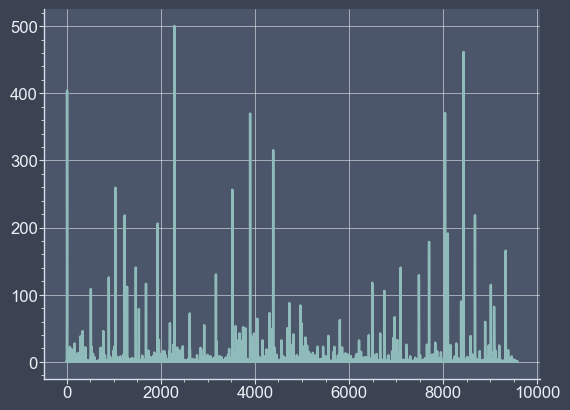

In [5]:
ratio02 = GS002['intensity'] / GS000['intensity']
plt.plot(GS000['pixel'], ratio02)
# plt.xlim(4400,4500)
# plt.ylim(0, 1.5)
plt.show()

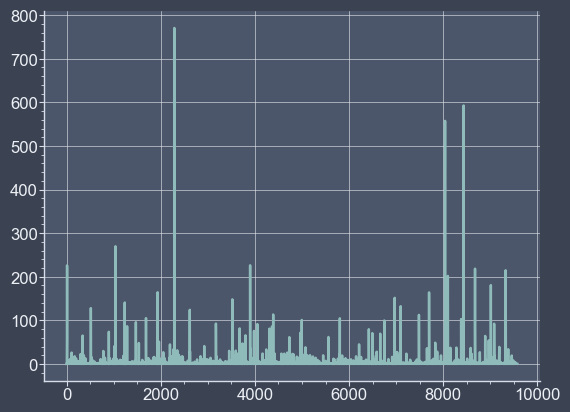

In [6]:
ratio03 = GS003['intensity'] / GS000['intensity']
plt.plot(GS000['pixel'], ratio03)
plt.show()

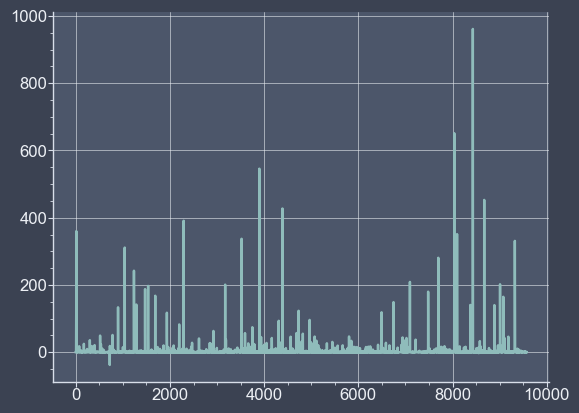

In [11]:
ratio04 = GS004['intensity'] / GS000['intensity']
plt.plot(GS000['pixel'], ratio04)
plt.show()

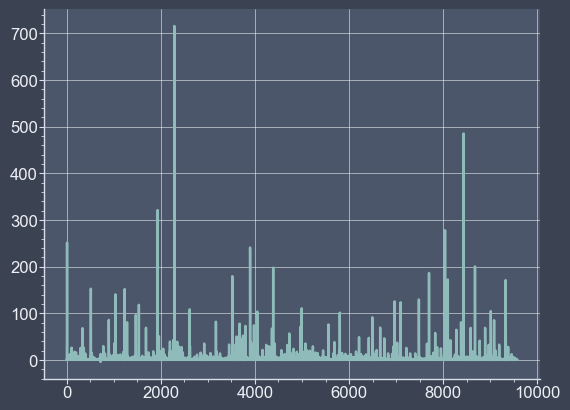

In [13]:
ratio05 = GS005['intensity'] / GS000['intensity']
plt.plot(GS000['pixel'], ratio05)
plt.show()

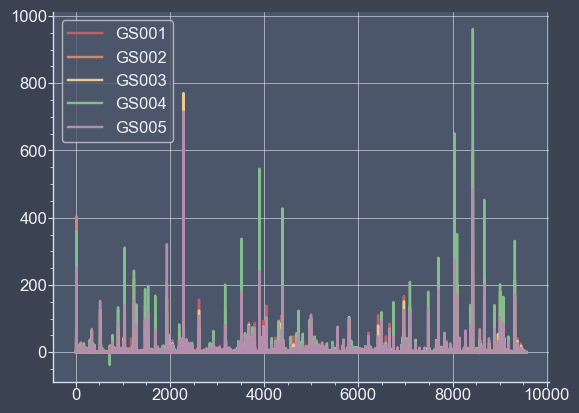

In [40]:
plt.plot(GS000['pixel'], ratio01, color = '#bf616a', label = 'GS001')
plt.plot(GS000['pixel'], ratio02, color = '#d08770', label = 'GS002')
plt.plot(GS000['pixel'], ratio03, color = '#ebcb8b', label = 'GS003')
plt.plot(GS000['pixel'], ratio04, color = '#83be8c', label = 'GS004')
plt.plot(GS000['pixel'], ratio05, color = '#b48ead', label = 'GS005')
plt.legend()
plt.savefig('GS000_ratio.png')
plt.show()
#all look quite similar - use different reference lamp

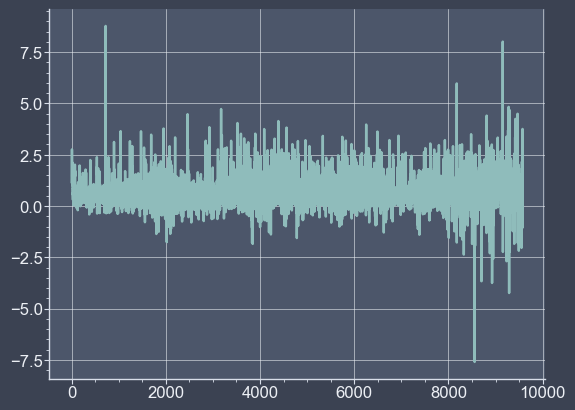

In [14]:
ratio45 = GS004['intensity'] / GS005['intensity']
plt.plot(GS004['pixel'], ratio45)
plt.show()

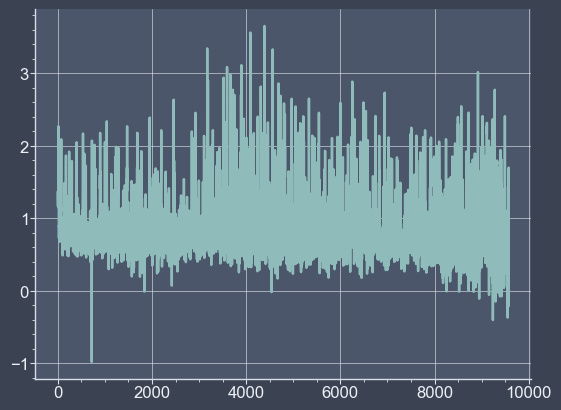

In [15]:
ratio25 = GS002['intensity'] / GS005['intensity']
plt.plot(GS002['pixel'], ratio25)
plt.show()

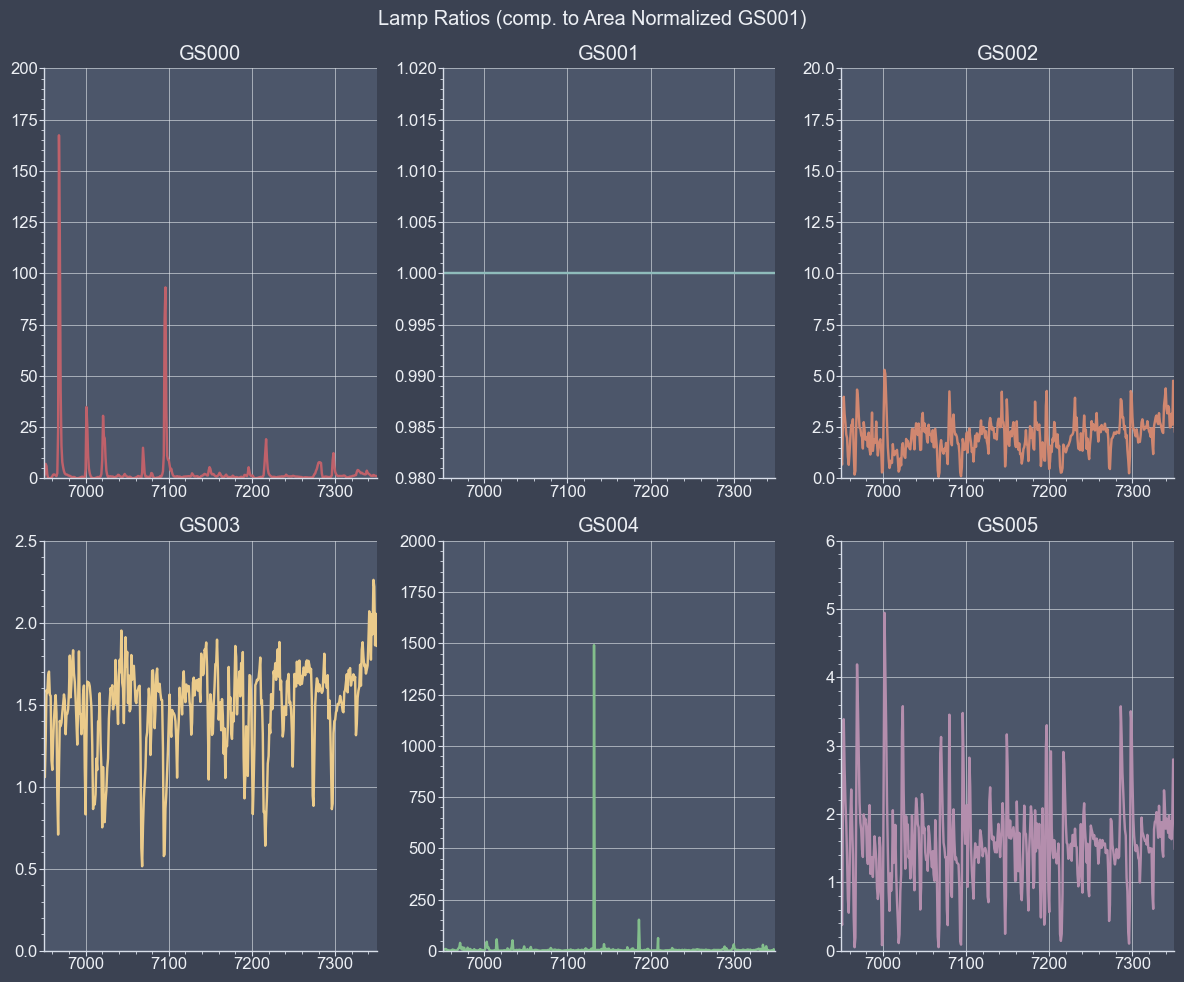

In [49]:
ratio10 = GS001['intensity'] / GS000['intensity']
ratio11 = GS001['intensity'] / GS001['intensity']
ratio12 = GS001['intensity'] / GS002['intensity']
ratio13 = GS001['intensity'] / GS003['intensity']
ratio14 = GS001['intensity'] / GS004['intensity']
ratio15 = GS001['intensity'] / GS005['intensity']

fig, ax = plt.subplots(2, 3, figsize = (12,10))
fig.suptitle('Lamp Ratios (comp. to Area Normalized GS001)')
ax[0,0].plot(GS001['pixel'], ratio10, color = '#bf616a')
ax[0,0].set_title('GS000')
ax[0,0].set_xlim(6950, 7350)
ax[0,0].set_ylim(0, 200)
ax[0,1].plot(GS001['pixel'], ratio11)
ax[0,1].set_title('GS001')
ax[0,1].set_xlim(6950, 7350)
ax[0,1].set_ylim(0.98, 1.02)
ax[0,2].plot(GS001['pixel'], ratio12, color = '#d08770')
ax[0,2].set_title('GS002')
ax[0,2].set_xlim(6950, 7350)
ax[0,2].set_ylim(0,20)
ax[1,0].plot(GS001['pixel'], ratio13, color = '#ebcb8b', label = 'GS003')
ax[1,0].set_title('GS003')
ax[1,0].set_xlim(6950, 7350)
ax[1,0].set_ylim(0,2.5)
ax[1,1].plot(GS001['pixel'], ratio14, color = '#83be8c', label = 'GS004')
ax[1,1].set_title('GS004')
ax[1,1].set_xlim(6950, 7350)
ax[1,1].set_ylim(0,2000)
ax[1,2].plot(GS001['pixel'], ratio15, color = '#b48ead', label = 'GS005')
ax[1,2].set_title('GS005')
ax[1,2].set_xlim(6950, 7350)
ax[1,2].set_ylim(0,6)


# plt.plot(GS001['pixel'], ratio10, color = '#bf616a', label = 'GS000')
# plt.plot(GS001['pixel'], ratio12, color = '#d08770', label = 'GS002')
# plt.plot(GS001['pixel'], ratio13, color = '#ebcb8b', label = 'GS003')
# plt.plot(GS001['pixel'], ratio14, color = '#83be8c', label = 'GS004')
# plt.plot(GS001['pixel'], ratio15, color = '#b48ead', label = 'GS005')

# plt.legend()
# plt.title('Lamp Ratios (comp. to GS001)')
# plt.xlabel('Pixel (Wavelength Space)')
# plt.ylabel('Ratio (Area Normalized GS0001/GS00_)')
# plt.xlim(0,10000)
fig.tight_layout()
plt.savefig('GS001_ratios.png')
plt.show()

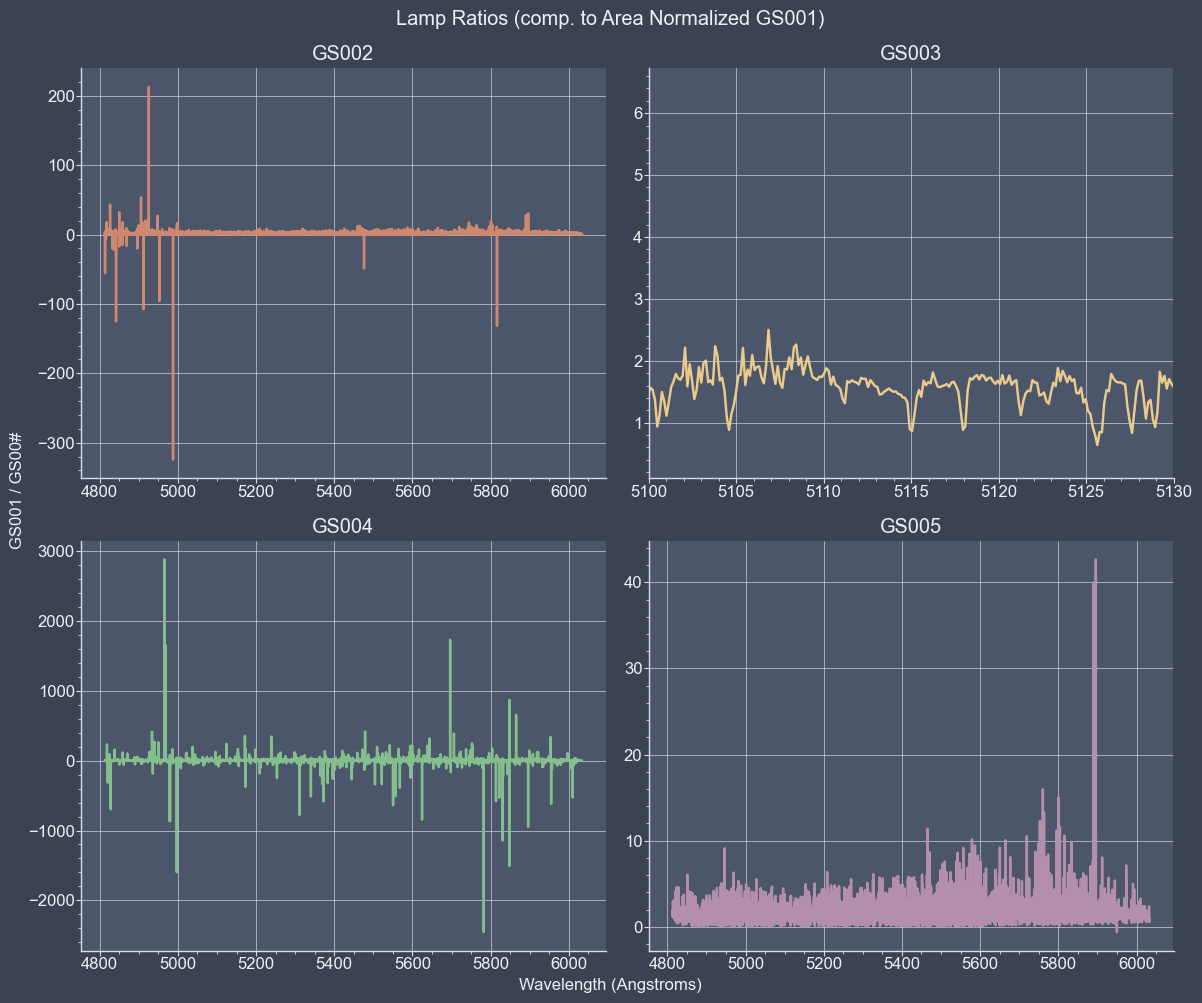

In [14]:
ratio12_sol = GS001_wavesol['intensity'] / GS002_wavesol['intensity']
ratio13_sol = GS001_wavesol['intensity'] / GS003_wavesol['intensity']
ratio14_sol = GS001_wavesol['intensity'] / GS004_wavesol['intensity']
ratio15_sol = GS001_wavesol['intensity'] / GS005_wavesol['intensity']

fig, ax = plt.subplots(2, 2, figsize = (12,10))
fig.suptitle('Lamp Ratios (comp. to Area Normalized GS001)')


ax[0,0].plot(GS001_wavesol['wavelength'], ratio12_sol, color = '#d08770')
ax[0,0].set_title('GS002')
# ax[0,0].set_xlim(6950, 7350)
# ax[0,0].set_ylim(0,20)
ax[0,1].plot(GS001_wavesol['wavelength'], ratio13_sol, color = '#ebcb8b', label = 'GS003')
ax[0,1].set_title('GS003')
ax[0,1].set_xlim(5100, 5130)
# ax[0,1].set_ylim(0,2.5)
ax[1,0].plot(GS001_wavesol['wavelength'], ratio14_sol, color = '#83be8c', label = 'GS004')
ax[1,0].set_title('GS004')
# ax[1,0].set_xlim(6950, 7350)
# ax[1,0].set_ylim(0,2000)
ax[1,1].plot(GS001_wavesol['wavelength'], ratio15_sol, color = '#b48ead', label = 'GS005')
ax[1,1].set_title('GS005')
# ax[1,1].set_xlim(6950, 7350)
# ax[1,1].set_ylim(0,6)


fig.text(0.5, 0.0, 'Wavelength (Angstroms)', ha='center')
fig.text(0.0, 0.5, 'GS001 / GS00#', va='center', rotation='vertical')
fig.tight_layout()
plt.savefig('GS001_ratios_wavesol.png')
plt.show()

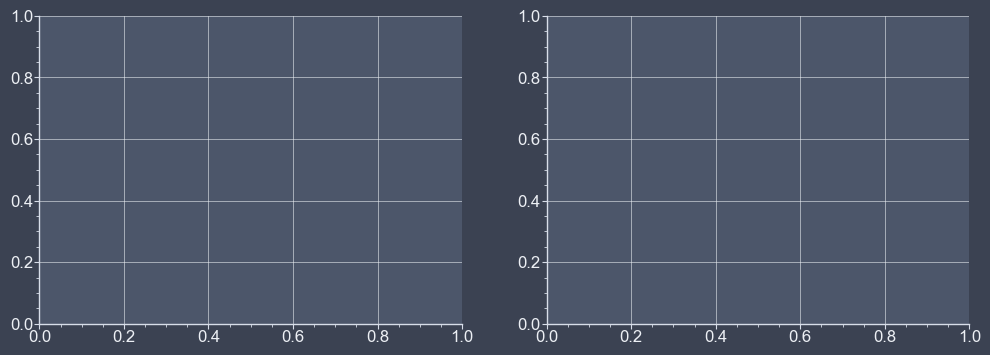

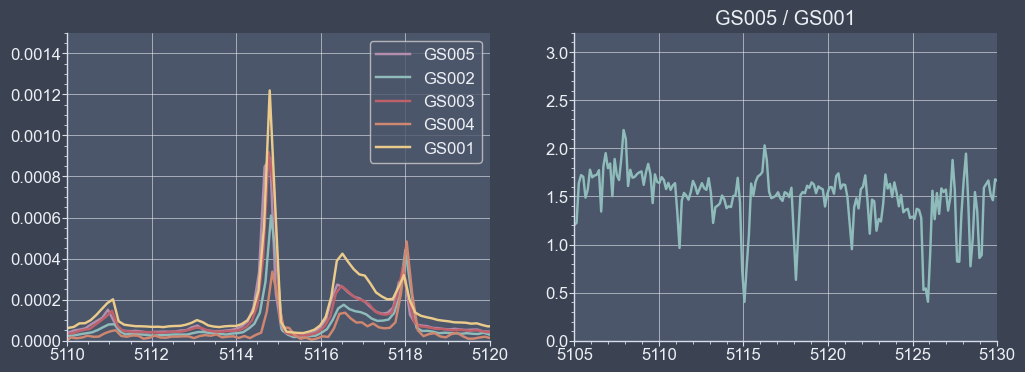

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

GS5_interp_1 = np.interp(GS001_wavesol['wavelength'],GS005_wavesol['wavelength'], GS005_wavesol['intensity'])
ratio_15_test =GS001_wavesol['intensity'] /  GS5_interp_1
ax[0].plot(GS005_wavesol['wavelength'], GS5_interp_1, color = '#b48ead', label = 'GS005')

ax[0].plot(GS002_wavesol['wavelength'], spectra[1],  label = 'GS002')
ax[0].plot(GS003_wavesol['wavelength'], spectra[2],  label = 'GS003')
ax[0].plot(GS004_wavesol['wavelength'], spectra[3],  label = 'GS004')
ax[0].plot(GS001_wavesol['wavelength'], spectra[0],  label = 'GS001')
ax[1].plot(GS001_wavesol['wavelength'], ratio_15_test, label = 'GS005')
ax[1].set_title('GS005 / GS001')
ax[1].set_xlim(5105, 5130)
ax[0].set_xlim(5110, 5120)
ax[0].set_ylim(0,0.0015)
ax[0].legend()
ax[1].set_ylim(0,3.2)
plt.show()